In [208]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [209]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [210]:
X.shape

(10, 2)

In [211]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

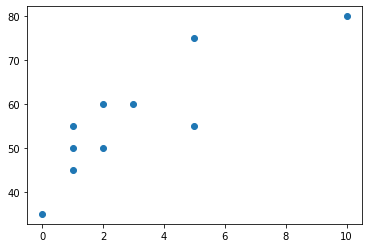

In [212]:
plt.scatter(X[:, 1], y);

Уравнение прямой: $y = a*x + b$

In [213]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

### Домашнее задание <a class="anchor" id="hw"></a><center>

1. Подберите скорость обучения (eta) и количество итераций

In [214]:
n = X.shape[0]

eta = 0.1 #при данном значении скорость эффективного обучения оптимальная (если условие на каждой 10 итерации делить eta на 1.1 оставляем без изменений)
n_iter = 111 #итераций достаточно для минимизации MSE (минимальное значение 43.97 на 110 итерации) при скорости обучения 0.1

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    mae = calc_mae(y, y_pred)#добавили MAE
    grad = 2/n*X.T@(y_pred- y)#=поменяли расчет весов
    W -= eta*grad
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}, MAE = {round(mae, 2)}')#добавили MAE, чтобы понимать, на сколько баллов ЕГЭ в среднем ошибается наша обученная модель

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75, MAE = 54.0
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05, MAE = 101136.85
Iteration #20: W_new = [ 7732434.81888022 42641607.3785219 ], MSE = 9128819654907584.0, MAE = 71404720.49
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266856e+20, MAE = 11402593641.56
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.5451335298159506e+23, MAE = 377029102187.54
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.57229562050015e+24, MAE = 2312211936785.72
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126476032e+24, MAE = 2285387066610.75
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528283956e+23, MAE = 302729827326.01
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.125533537874477e+19, MAE = 4178127313.13
Iteratio

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [215]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y)) #исправили Х на Х.Т
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


3*. 1. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.
2. Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [216]:
#1 вариант: веса перестают меняться меньше порога
n = X.shape[0]

eta = 0.1
E = 0.002

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')
iteration = 0
while True:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    mae = calc_mae(y, y_pred)
    grad = 2/n*X.T@(y_pred- y)
    deltaW = eta*grad
    W -= deltaW
    if iteration % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{iteration}: W_new = {W}, MSE = {round(err, 2)}, MAE = {round(mae, 2)}')
    iteration +=1
        
    if abs(deltaW[0])<E and abs(deltaW[1])<E:#предполагаем, что для целей данной задачи все значения вектора w должны меняться менее, чем на Е.
        break

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75, MAE = 54.0
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05, MAE = 101136.85
Iteration #20: W_new = [ 7732434.81888022 42641607.3785219 ], MSE = 9128819654907584.0, MAE = 71404720.49
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266856e+20, MAE = 11402593641.56
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.5451335298159506e+23, MAE = 377029102187.54
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.57229562050015e+24, MAE = 2312211936785.72
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126476032e+24, MAE = 2285387066610.75
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528283956e+23, MAE = 302729827326.01
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.125533537874477e+19, MAE = 4178127313.13
Iteratio

In [217]:
#2 вариант: ошибка за итерацию начинает изменяться ниже определённого порога
n = X.shape[0]

eta = 0.1
E = 0.5

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')
iteration = 0
while True:
    y_pred = np.dot(X, W)
    err_prev = err #предыдущее значение ошибки
    err = calc_mse(y, y_pred) #новое значение ошибки
    mae = calc_mae(y, y_pred)
    grad = 2/n*X.T@(y_pred- y)
    deltaW = eta*grad
    W -= deltaW
    if iteration % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{iteration}: W_new = {W}, MSE = {round(err, 2)}, MAE = {round(mae, 2)}')
    iteration +=1    
    if abs(err-err_prev)<E:
        print(f'LastIteration #{iteration}: W_new = {W}, MSE = {round(err, 2)}, MAE = {round(mae, 2)}')
        break

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75, MAE = 54.0
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05, MAE = 101136.85
Iteration #20: W_new = [ 7732434.81888022 42641607.3785219 ], MSE = 9128819654907584.0, MAE = 71404720.49
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266856e+20, MAE = 11402593641.56
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.5451335298159506e+23, MAE = 377029102187.54
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.57229562050015e+24, MAE = 2312211936785.72
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126476032e+24, MAE = 2285387066610.75
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528283956e+23, MAE = 302729827326.01
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.125533537874477e+19, MAE = 4178127313.13
Iteratio